### Bibliotheken importieren

In [143]:
import pandas as pd
import nltk
import string
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#nltk.download('punkt') # Punkt Tokenizer -> Satzerkennung

#pip install nltk
#pip install matplotlib pandas

### Finales Dataframe speichern

### Datenimport

In [56]:
# Datensets einlesen
sentence = pd.read_csv(r'sentence_dataset.csv',header= 0)
tt = pd.read_csv(r'tt_dataset.csv', delimiter= ',', header= 0)


,sentence,phonemes,soundex
0,He was accorded a State funeral and was buried...,"[['HH', 'IY1'], ['W', 'AA1', 'Z'], ['AH0', 'K'...","['H000', 'W200', 'A263', 'A000', 'S330', 'F564..."
1,In American English whilst is considered to be...,"[['IH0', 'N'], ['AH0', 'M', 'EH1', 'R', 'AH0',...","['I500', 'A562', 'E524', 'W423', 'I200', 'C523..."
2,Once again she is seen performing on a compute...,"[['W', 'AH1', 'N', 'S'], ['AH0', 'G', 'EH1', '...","['O520', 'A250', 'S000', 'I200', 'S500', 'P616..."
3,Hippety Hopper returns in McKimsons Pop Im Pop.,"[['HH', 'IH1', 'P', 'AH0', 'T', 'IY0'], ['HH',...","['H130', 'H160', 'R365', 'I500', 'M252', 'P100..."
4,Today their programs are available on the Inte...,"[['T', 'AH0', 'D', 'EY1'], ['DH', 'EH1', 'R'],...","['T300', 'T600', 'P626', 'A600', 'A141', 'O500..."
...,...,...,...
101098,Force B Adml.,"[['F', 'AO1', 'R', 'S'], ['B', 'IY1'], [], ['A...","['F620', 'B000', 'A354']"
101099,It has less complex feature than other micropr...,"[['IH1', 'T'], ['HH', 'AE1', 'Z'], ['L', 'EH1'...","['I300', 'H200', 'L200', 'C514', 'F360', 'T500..."
101100,Here his attention was drawn to geology.,"[['HH', 'IY1', 'R'], ['HH', 'IH1', 'Z'], ['AH0...","['H600', 'H200', 'A353', 'W200', 'D650', 'T000..."
101101,Every element of Milnor Ktheory can be written...,"[['EH1', 'V', 'ER0', 'IY0'], ['EH1', 'L', 'AH0...","['E160', 'E455', 'O100', 'M456', 'K360', 'C500..."


### Data Understanding

#### Basierend auf vollständigen Tongue Twister und Satz

In [57]:
# Durchschnittliche Satz/TT-Länge
# TT
längeZeile = tt['text'].apply(len)
durchschnittLänge = int(round(längeZeile.mean()))

print("Die durschschnittliche Länge (Zeichen) der Toungue Twister beträgt (gerundet):" , durchschnittLänge)

# Sentence
längeSent = sentence['sentence'].apply(len)
durchschnittSent = int(round(längeSent.mean()))

print("Die durschschnittliche Länge (Zeichen) der Sätze beträgt (gerundet):" , durchschnittSent)

Die durschschnittliche Länge (Zeichen) der Toungue Twister beträgt (gerundet): 78
Die durschschnittliche Länge (Zeichen) der Sätze beträgt (gerundet): 56


In [64]:
# Fragestellung: Bestehen Tongue Twister in der Regel nur aus einem Satz?
# Funktionsdefinition
def zähle_sätze(Sätze):
    sätze = nltk.sent_tokenize(Sätze)
    return len(sätze)

# TT
tt['AnzahlSätze'] = tt['text'].apply(zähle_sätze)

durchschnittAnzahlSätzeTT = round(tt['AnzahlSätze'].mean(), 2)
maximaleAnzahlSätzeTT = round(tt['AnzahlSätze'].max(), 2)

print("Die durchschnittliche Anzahl von Sätzen der Tongue Twister ist (gerundet):", durchschnittAnzahlSätzeTT)
print("Die maximale Anzahl von Sätzen eines Tongue Twister ist (gerundet):", maximaleAnzahlSätzeTT)

# größterTT = tt.loc[tt['AnzahlSätze'] == 66]
# print(größterTT)

# Überprüfung Annahme Sentence-Datensatz: Immer aus einem Satz bestehend
sentence['AnzahlSätze'] = sentence['sentence'].apply(zähle_sätze)

durchschnittAnzahlSätzeSentence = round(sentence['AnzahlSätze'].max(), 2)

print("Die maximale Anzahl von Sätzen ist (gerundet):", durchschnittAnzahlSätzeSentence)

Die durchschnittliche Anzahl von Sätzen der Tongue Twister ist (gerundet): 1.45
Die maximale Anzahl von Sätzen der Tongue Twister ist (gerundet): 66
Die maximale Anzahl von Sätzen ist (gerundet): 1


In [59]:
# Wortanzahl je Satz/TT und im Durchschnitt
# Funktionsdefinition
def wortanzahl (wortAnzahl):
    wörterZahl = wortAnzahl.split()
    return len(wörterZahl)

# TT
tt['Wortanzahl'] = tt['text'].apply(wortanzahl)
durchschnittWortanzahlTT = int(round(tt['Wortanzahl'].mean()))

print("Die durchschnittliche Wortanzahl der Tongue Twister beträgt (gerundet):" , durchschnittWortanzahlTT)

# Sentence
sentence['Wortanzahl'] = sentence['sentence'].apply(wortanzahl)
durchschnittWortanzahlSent = int(round(sentence['Wortanzahl'].mean()))

print("Die durchschnittliche Wortanzahl der Sätze beträgt (gerundet):" , durchschnittWortanzahlSent)

Die durchschnittliche Wortanzahl der Tongue Twister beträgt (gerundet): 13
Die durchschnittliche Wortanzahl der Sätze beträgt (gerundet): 10


In [101]:
# Zählen der Wortlängen sowie deren Varianz je Satz/TT und im Durchschnitt
# Funktionsdefinition
def wortlängen(wort):
    wörter = wort.split()
    return [len(wort) for wort in wörter]

#TT
tt['Wortlängen'] = tt['text'].apply(wortlängen)  

varWortlängenTT = tt['Wortlängen'].apply(np.var)
tt['VarWortlängen'] = varWortlängenTT
durchVarWortlängenTT = round(varWortlängenTT.mean(),2)

print("Die durschnittliche Varianz der Wortlängen von Tongue Twistern beträgt (gerundet):" , durchVarWortlängenTT)

# Sentence
sentence['Wortlängen'] = sentence['sentence'].apply(wortlängen)  

varWortlängenSent = sentence['Wortlängen'].apply(np.var)
sentence['VarWortlängen'] = varWortlängenSent
durchVarWortlängenSent = round(varWortlängenSent.mean(),2)

print("Die durschnittliche Varianz der Wortlängen der Sätze beträgt (gerundet):" , durchVarWortlängenSent)

Die durschnittliche Varianz der Wortlängen von Tongue Twistern beträgt (gerundet): 4.11
Die durschnittliche Varianz der Wortlängen der Sätze beträgt (gerundet): 6.33


#### Basierend auf Phoneme

In [103]:
tt

,text,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100...",3,34,"[5, 5, 6, 1, 4, 2, 7, 8, 1, 4, 2, 7, 7, 5, 5, ...",4.575260
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000...",2,20,"[1, 3, 5, 7, 2, 1, 4, 5, 5, 5, 3, 4, 3, 7, 3, ...",2.800000
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524...",1,13,"[3, 4, 6, 5, 3, 7, 5, 2, 3, 6, 6, 3, 6]",2.402367
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500...",1,10,"[3, 3, 1, 4, 4, 2, 1, 5, 5, 4]",1.960000
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330...",1,10,"[4, 5, 2, 3, 5, 5, 7, 3, 4, 6]",2.040000
...,...,...,...,...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230...",1,8,"[4, 4, 2, 6, 3, 5, 4, 6]",1.687500
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230...",2,31,"[3, 6, 4, 7, 2, 5, 5, 7, 6, 6, 3, 6, 4, 6, 4, ...",3.506764
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140...",1,10,"[6, 5, 7, 6, 5, 7, 6, 5, 7, 3]",1.410000
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620...",2,53,"[2, 9, 7, 12, 7, 4, 10, 3, 8, 5, 9, 5, 12, 6, ...",8.142399


In [138]:
phoneme = tt['phonemes']


[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['IH1', 'F'], ['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['W', 'EH1', 'R', 'Z'], ['DH', 'AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T']]: 1
[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0'], ['S', 'IH1', 'T', 'IH0', 'NG'], ['IH0', 'N'], ['AH0'], ['SH', 'UW1'], ['SH', 'AY1', 'N'], ['SH', 'AA1', 'P'], ['W', 'EH1', 'R'], ['SH', 'IY1'], ['S', 'IH1', 'T', 

In [134]:
# Häufigkeiten 
# TT
# Liste aus Listen zerlegen
phonemeAlt = tt['phonemes']
# phonemZählung = {}
# for sublist in phoneme:
#     for phonem in sublist:
#         if phonem in phonemZählung:
#             phonemZählung[phonem] +-1
#         else:
#             phonemZählung[phonem] =1
# for phonem, anzahl in phonemZählung.items():
#     print(f"'{phonem}' kommt {anzahl} mal vor.")
phonemeNeu = phonemeAlt[1:-1].replace("'", "").str.split(', ')
phonemeNeu
        

1       [[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY...
2       [[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B...
3       [[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], [...
4       [[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T...
5       [[['D', 'IH0', 'N', 'IY1', 'S'], ['S', 'IY1', ...
                              ...                        
2670    [[['M', 'OW1', 'Z', 'AH0', 'S'], ['S', 'AH0', ...
2671    [[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], ...
2672    [[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'],...
2673    [[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', ...
2674    [[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', ...
Name: phonemes, Length: 2674, dtype: object

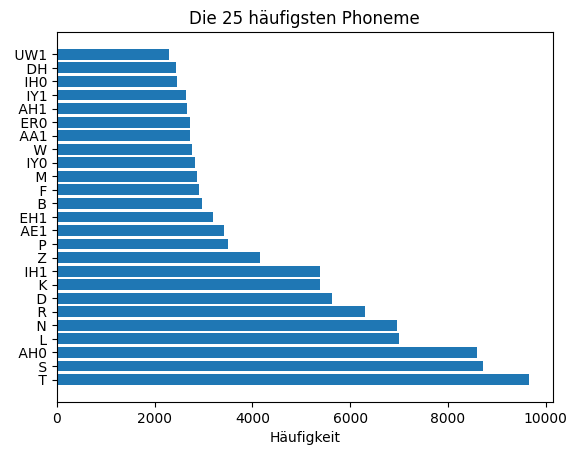

In [151]:
def zähle_phoneme(listeVonListen):
    phonemHäufigkeit = Counter()

    for phonemStr in listeVonListen:
        phonemStr = phonemStr.replace('[', '').replace(']', '').replace("'", '')
        phoneme = phonemStr.split(",")
        phonemHäufigkeit.update(phoneme)
    return phonemHäufigkeit

# Beispielaufruf
phonemeAlt = tt['phonemes']

anzahlPhoneme = zähle_phoneme(phonemeAlt)

dfAnzahlPhoneme = pd.DataFrame(list(anzahlPhoneme.items()), columns=['Phonem', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlPhoneme = dfAnzahlPhoneme.sort_values(by='Häufigkeit', ascending=False)

top25 = dfAnzahlPhoneme.head(25)

plt.barh(top25['Phonem'], top25['Häufigkeit'])
plt.xlabel('Häufigkeit')
#plt.ylabel('Phonem')
plt.title('Die 25 häufigsten Phoneme')
plt.show()

#### Basierend auf Soundex

In [135]:
# Häufigkeiten
# TT

1       [['I000', 'S000', 'S200', 'S352', 'I500', 'A00...
2       [['H000', 'M500', 'B632', 'C430', 'T000', 'M52...
3       [['H000', 'C500', 'A000', 'C450', 'C650', 'I50...
4       [['S530', 'T230', 'T000', 'T500', 'T520', 'S33...
5       [['D520', 'S200', 'T000', 'F420', 'D520', 'S20...
                              ...                        
2670    [['M220', 'S122', 'H200', 'T220', 'A600', 'R22...
2671    [['T500', 'S310', 'U100', 'M236', 'A530', 'T23...
2672    [['N000', 'K240', 'W400', 'W234', 'A300', 'B23...
2673    [['P614', 'P160', 'P140', 'P614', 'P160', 'P14...
2674    [['D000', 'D625', 'D160', 'D626', 'D626', 'D62...
Name: soundex, Length: 2674, dtype: object

### Output Tabellen

In [68]:
# TT
tt

,text,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100...",3,34,"[5, 5, 6, 1, 4, 2, 7, 8, 1, 4, 2, 7, 7, 5, 5, ...",4.575260
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000...",2,20,"[1, 3, 5, 7, 2, 1, 4, 5, 5, 5, 3, 4, 3, 7, 3, ...",2.800000
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524...",1,13,"[3, 4, 6, 5, 3, 7, 5, 2, 3, 6, 6, 3, 6]",2.402367
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500...",1,10,"[3, 3, 1, 4, 4, 2, 1, 5, 5, 4]",1.960000
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330...",1,10,"[4, 5, 2, 3, 5, 5, 7, 3, 4, 6]",2.040000
...,...,...,...,...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230...",1,8,"[4, 4, 2, 6, 3, 5, 4, 6]",1.687500
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230...",2,31,"[3, 6, 4, 7, 2, 5, 5, 7, 6, 6, 3, 6, 4, 6, 4, ...",3.506764
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140...",1,10,"[6, 5, 7, 6, 5, 7, 6, 5, 7, 3]",1.410000
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620...",2,53,"[2, 9, 7, 12, 7, 4, 10, 3, 8, 5, 9, 5, 12, 6, ...",8.142399


In [100]:
# Sentence
sentence

,sentence,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,He was accorded a State funeral and was buried...,"[['HH', 'IY1'], ['W', 'AA1', 'Z'], ['AH0', 'K'...","['H000', 'W200', 'A263', 'A000', 'S330', 'F564...",1,14,"[2, 3, 8, 1, 5, 7, 3, 3, 6, 2, 7, 3, 9, 9]",7.122449
1,In American English whilst is considered to be...,"[['IH0', 'N'], ['AH0', 'M', 'EH1', 'R', 'AH0',...","['I500', 'A562', 'E524', 'W423', 'I200', 'C523...",1,11,"[2, 8, 7, 6, 2, 10, 2, 2, 11, 2, 8]",11.520661
2,Once again she is seen performing on a compute...,"[['W', 'AH1', 'N', 'S'], ['AH0', 'G', 'EH1', '...","['O520', 'A250', 'S000', 'I200', 'S500', 'P616...",1,10,"[4, 5, 3, 2, 4, 10, 2, 1, 17, 6]",20.840000
3,Hippety Hopper returns in McKimsons Pop Im Pop.,"[['HH', 'IH1', 'P', 'AH0', 'T', 'IY0'], ['HH',...","['H130', 'H160', 'R365', 'I500', 'M252', 'P100...",1,8,"[7, 6, 7, 2, 9, 3, 2, 4]",6.000000
4,Today their programs are available on the Inte...,"[['T', 'AH0', 'D', 'EY1'], ['DH', 'EH1', 'R'],...","['T300', 'T600', 'P626', 'A600', 'A141', 'O500...",1,8,"[5, 5, 8, 3, 9, 2, 3, 9]",7.000000
...,...,...,...,...,...,...,...
101098,Force B Adml.,"[['F', 'AO1', 'R', 'S'], ['B', 'IY1'], [], ['A...","['F620', 'B000', 'A354']",1,3,"[5, 1, 5]",3.555556
101099,It has less complex feature than other micropr...,"[['IH1', 'T'], ['HH', 'AE1', 'Z'], ['L', 'EH1'...","['I300', 'H200', 'L200', 'C514', 'F360', 'T500...",1,8,"[2, 3, 4, 7, 7, 4, 5, 15]",14.609375
101100,Here his attention was drawn to geology.,"[['HH', 'IY1', 'R'], ['HH', 'IH1', 'Z'], ['AH0...","['H600', 'H200', 'A353', 'W200', 'D650', 'T000...",1,7,"[4, 3, 9, 3, 5, 2, 8]",6.122449
101101,Every element of Milnor Ktheory can be written...,"[['EH1', 'V', 'ER0', 'IY0'], ['EH1', 'L', 'AH0...","['E160', 'E455', 'O100', 'M456', 'K360', 'C500...",1,14,"[5, 7, 2, 6, 7, 3, 2, 7, 2, 1, 6, 3, 2, 8]",5.515306
